# Fit a RL model on hierarchical data

In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1,1,43,39,2,1,1,1.244082,0
1,1,1,2,60,50,4,3,1,1.101821,1
2,1,1,3,44,36,4,2,2,1.029923,0
3,1,1,4,55,55,4,3,2,1.368007,0
4,1,1,5,52,49,4,3,3,1.039329,1


## Initialize the model

In [3]:
# you can "turn on and off" different mechanisms:
model = rlssm.RLModel_2A(hierarchical_levels = 2,
                         increasing_sensitivity = False,
                         separate_learning_rates = True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_85e7d33dd046aaf5975b754dfee23d15 NOW.


## Fit

In [4]:
# sampling parameters
n_iter = 5000
n_chains = 2
n_thin = 1

# learning parameters
K = 4 # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5 # intitial learning value (Q0)

In [5]:
model_fit = model.fit(
    data, 
    K, 
    initial_value_learning,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter for parameter log_p_t[1] is 0.00023747030172105283!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[2] is 0.00023747030172105283!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[81] is 0.0002313787222847051!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[161] is 0.00023348617734135585!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[162] is 0.00023348617734135585!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[241] is 0.00023964664705545727!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[242] is 0.00023964664705545727!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter lo

### get Rhat

In [20]:
model_fit.rhat.describe()

,rhat
count,87.000000
mean,1.001652
std,0.003058
min,0.999611
25%,0.999975
50%,1.000402
75%,1.002264
max,1.017657


### get wAIC

In [7]:
model_fit.waic

{'lppd': -2568.4317960879453,
 'p_waic': 64.246543173176,
 'waic': 5265.356678522243,
 'waic_se': 90.23490325898337}

## Posteriors

In [8]:
model_fit.samples.describe()

,chain,draw,transf_mu_alpha_pos,transf_mu_alpha_neg,transf_mu_sensitivity,alpha_pos_sbj[1],alpha_pos_sbj[2],alpha_pos_sbj[3],alpha_pos_sbj[4],alpha_pos_sbj[5],...,sensitivity_sbj[18],sensitivity_sbj[19],sensitivity_sbj[20],sensitivity_sbj[21],sensitivity_sbj[22],sensitivity_sbj[23],sensitivity_sbj[24],sensitivity_sbj[25],sensitivity_sbj[26],sensitivity_sbj[27]
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.50000,1249.500000,0.066724,0.244974,0.361721,0.038006,0.010173,0.048696,0.146821,0.134911,...,0.136067,0.320794,0.367682,0.793641,0.591713,0.961189,0.420030,0.657458,0.092742,0.252568
std,0.50005,721.759958,0.018311,0.046023,0.056664,0.023549,0.004139,0.056156,0.084688,0.067579,...,0.142427,0.083155,0.059834,0.210083,0.127341,0.207392,0.084830,0.172396,0.048833,0.052704
min,0.00000,0.000000,0.024354,0.109829,0.194459,0.004458,0.002260,0.001171,0.016571,0.019734,...,0.013190,0.141832,0.216083,0.359327,0.321128,0.452598,0.223012,0.259511,0.022542,0.127103
25%,0.00000,624.750000,0.053892,0.213485,0.322546,0.023834,0.007603,0.003617,0.088741,0.086015,...,0.059877,0.259763,0.327552,0.654118,0.505373,0.816957,0.362855,0.536331,0.069057,0.217340
50%,0.50000,1249.500000,0.064572,0.240162,0.355767,0.032948,0.009383,0.031871,0.126847,0.121251,...,0.078173,0.309836,0.360764,0.754539,0.572355,0.938055,0.408312,0.637224,0.082764,0.245234
75%,1.00000,1874.250000,0.076803,0.271523,0.394753,0.045360,0.011671,0.080263,0.181019,0.168311,...,0.150494,0.368362,0.400960,0.881530,0.658451,1.081726,0.463639,0.755038,0.101191,0.279548
max,1.00000,2499.000000,0.175701,0.488028,0.655635,0.336519,0.056567,0.606490,0.750089,0.588811,...,1.598757,0.738939,1.068068,2.026769,1.952079,2.066180,1.350689,1.889106,1.253123,0.633065


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

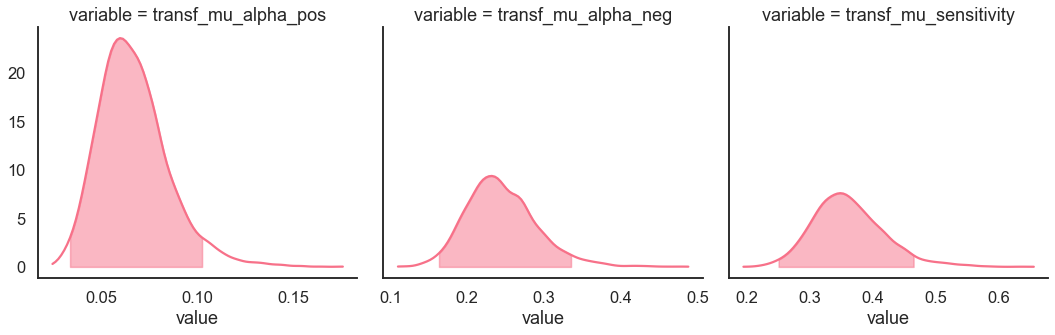

In [10]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=500)
pp

variable accuracy                                               ...            \
trial        1    2    3    4    5    6    7    8    9    10    ... 6455 6456   
sample                                                          ...             
1               1    1    0    0    1    0    0    0    1    1  ...    1    1   
2               1    1    0    1    1    0    0    1    0    1  ...    1    1   
3               0    1    0    0    1    0    1    0    1    1  ...    1    0   
4               1    0    0    0    1    1    0    0    1    1  ...    1    1   
5               1    0    0    0    1    0    1    1    1    0  ...    1    1   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
496             1    1    0    0    0    1    0    1    1    0  ...    1    0   
497             1    1    0    0    0    0    1    1    1    1  ...    0    1   
498             0    1    0    1    0    1    1    0    1    1  ...    0    1   
499             0    1    0    1    1    1    0    0    1    1  ...    1    1   
500             1    0    0    0    1    0    1    1    1    1  ...    1    1   

variable                                          
trial    6457 6458 6459 6460 6461 6462 6463 6464  
sample                                            
1           1    1    1    1    1    1    0    1  
2           1    1    1    1    1    1    1    1  
3           1    1    1    1    1    1    1    1  
4           1    1    1    1    1    1    1    1  
5           1    1    1    1    1    1    1    1  
...       ...  ...  ...  ...  ...  ...  ...  ...  
496         1    0    1    1    1    1    1    1  
497         0    1    1    1    1    0    1    1  
498         1    1    1    1    1    1    1    1  
499         1    0    1    1    1    0    1    1  
500         1    0    1    0    0    0    1    1  

[500 rows x 6464 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=500)
pp_summary

,mean_accuracy
sample,
1,0.805693
2,0.804301
3,0.789759
4,0.802754
5,0.803218
...,...
496,0.797184
497,0.790068
498,0.803991


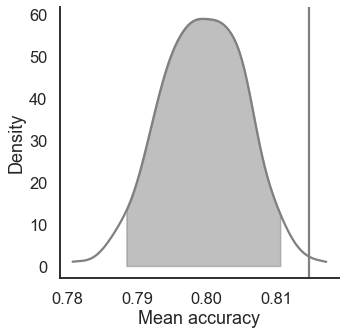

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

model_fit.plot_mean_posterior_predictives(n_posterior_predictives=500, ax=ax, show_intervals='HDI')

ax.set_ylabel('Density')
ax.set_xlabel('Mean accuracy')

sns.despine()

### Grouped

In [15]:
import numpy as np

In [16]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [17]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_label', 'block_bins', 'choice_pair'], n_posterior_predictives=500)

mean_accuracy
block_label block_bins choice_pair sample               
1           1          AB          1            0.555556
                                   2            0.555556
                                   3            0.603175
                                   4            0.507937
                                   5            0.507937
...                                                  ...
3           8          CD          496          0.777778
                                   497          0.722222
                                   498          0.833333
                                   499          0.722222
                                   500          0.777778

[48000 rows x 1 columns]

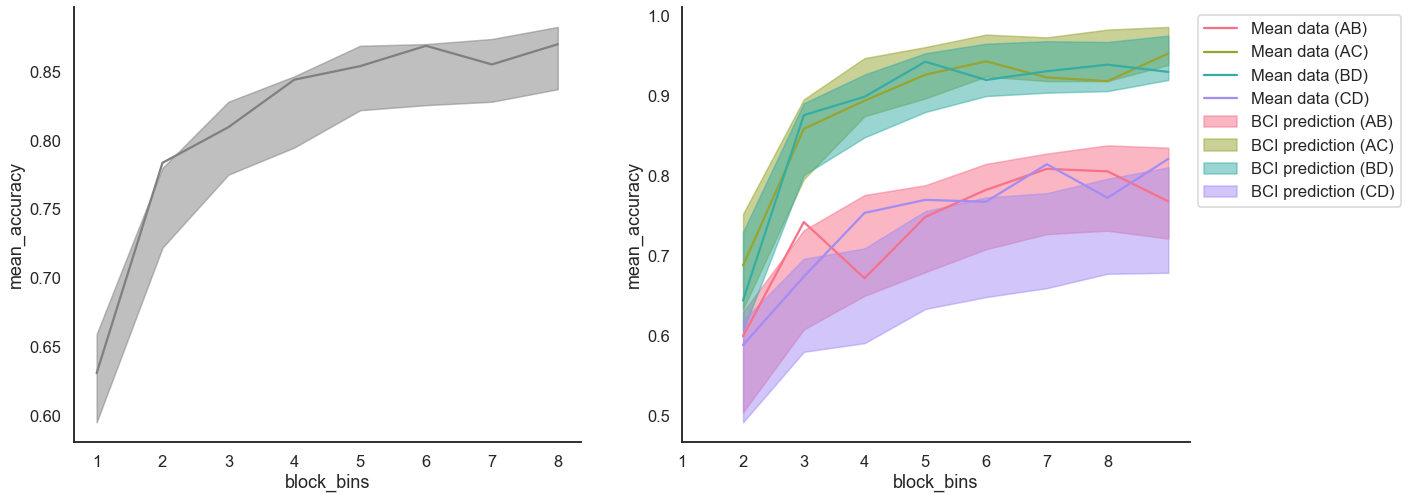

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,8))

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], n_posterior_predictives=500, ax=axes[0])

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], n_posterior_predictives=500, ax=axes[1])

sns.despine()